In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [9]:
def get_data():
    filepath = 'BTC-USDT-from-2023-09-01-to-2023-10-19.csv'
    data = pd.read_csv(filepath)
    data = data.sort_values('Timestamp')
    data['Date'] = data['Timestamp']
    data.head()
    arr = data['Close'].values
    arr = np.reshape(arr, (-1, 1))
    mm = MinMaxScaler()
    arr = mm.fit_transform(arr)
    arr = np.reshape(arr, (-1))
    X = []
    Label = []
    window_len = 12

    for i in range(len(arr) - window_len -1):
        X.append(arr[i:i + window_len])
        Label.append(arr[i + window_len])

    X = np.array(X)
    Label = np.array(Label)

    X_train = X[:3500]
    Label_train = Label[:3500]

    X_test = X[3500:]
    Label_test = Label[3500:]
    return X_train, Label_train, X_test, Label_test

X_train, Label_train, X_test, Label_test = get_data()

In [10]:
import tensorflow as tf
window_len = 12
hidden_units = 64

model_layers = [
    tf.keras.layers.Reshape((window_len, 1), input_shape=(window_len,)),
    tf.keras.layers.SimpleRNN(units=hidden_units, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]

In [11]:
model = tf.keras.Sequential(model_layers)
print(model.summary())

2023-10-19 15:05:46.502510: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-19 15:05:46.502550: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 12, 1)             0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4291 (16.76 KB)
Trainable params: 4291 (16.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Label_train, epochs=100)

Epoch 1/100


2023-10-19 15:05:47.722355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


110/110 [==============================] - 12s 98ms/step - loss: 0.0443
Epoch 2/100
110/110 [==============================] - 11s 96ms/step - loss: 0.0377
Epoch 3/100
110/110 [==============================] - 10s 87ms/step - loss: 0.0332
Epoch 4/100
110/110 [==============================] - 10s 88ms/step - loss: 0.0301
Epoch 5/100
110/110 [==============================] - 10s 91ms/step - loss: 0.0280
Epoch 6/100
110/110 [==============================] - 9s 80ms/step - loss: 0.0266
Epoch 7/100
110/110 [==============================] - 10s 87ms/step - loss: 0.0258
Epoch 8/100
110/110 [==============================] - 10s 89ms/step - loss: 0.0253
Epoch 9/100
110/110 [==============================] - 9s 80ms/step - loss: 0.0251
Epoch 10/100
110/110 [==============================] - 10s 87ms/step - loss: 0.0249
Epoch 11/100
110/110 [==============================] - 11s 101ms/step - loss: 0.0248
Epoch 12/100
110/110 [==============================] - 8s 74ms/step - loss: 0.0248
Epo

In [13]:
def plot_loss(loss):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(loss)), loss)
    plt.grid(True)
    plt.show()

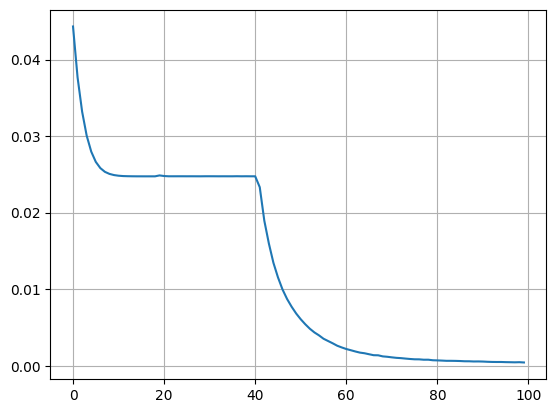

In [14]:
plot_loss(history.history['loss'])

In [15]:
def plot_result(prediction, true):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(prediction)), prediction, label='prediction')
    ax.plot(range(len(true)), true, label='true')
    ax.legend(['prediction', 'true'])
    plt.show()

 9/33 [=======>......................] - ETA: 0s

2023-10-19 15:20:47.843135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 1s 16ms/step


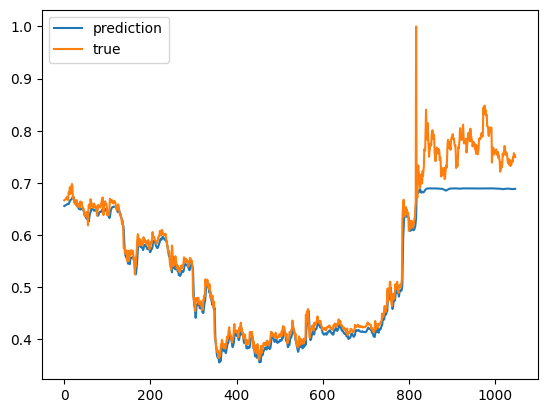

In [16]:
prediction = model.predict(X_test)

plot_result(prediction, Label_test)